## **Data Overview**

### Video Game Sales Data
The file at [this link](https://g-schmit.github.io/data/vg_sales.csv) contains data on video game sales. It was obtained from [Kaggle](https://www.kaggle.com/datasets/gregorut/videogamesales) and includes the following information:

| Column Name   | Description                                    |
|---------------|------------------------------------------------|
| **Rank**      | The rank of the game in sales                  |
| **Name**      | The name of the game                           |
| **Platform**  | Platform on which the game was released (PC, PS4, etc.) |
| **Year**      | Year of release                                |
| **Genre**     | Genre of the game                              |
| **Publisher** | Publisher of the game                          |
| **NA_Sales**  | Sales in North America (in millions)           |
| **EU_Sales**  | Sales in Europe (in millions)                  |
| **JP_Sales**  | Sales in Japan (in millions)                   |
| **Other_Sales** | Sales in the rest of the world (in millions) |
| **Global_Sales** | Total global sales                          |

### MetaCritic Scores Data
Another file is available at [this link](https://g-schmit.github.io/data/all_meta_games.csv). In this file, we can find the MetaCritic scores of games published from 1995 to 2021. This file can help determine links between sales and game scores. It contains the following information:

| Column Name   | Description                                    |
|---------------|------------------------------------------------|
| **name**      | The name of the game                           |
| **platform**  | Platform on which the game was released        |
| **release_date** | Release date                                |
| **summary**   | Summary of the game                            |
| **meta_score** | Score given by MetaCritic                     |
| **user_review** | Score given by users                         |







## **Objective**
The objective here is to analyze these data together in order to answer the following questions:

1. **Impact of Ratings on Sales**
   - Explain if the ratings of games (MetaCritic and user reviews) have an impact on global and regional game sales.

2. **Differences in Sales by Region**
   - Explain the differences in sales by region (North America, Europe, Japan, and the rest of the world).

We will also look for other external data sets in order to rich our existing data to have better results, and in order to apply supplimentary tests.








---


# **1. Load Data**



---



- read csv files and index gamesSales dataset by rank
- parse date colomns for both datasets
- show the first 5 rows of each dataset

In [1]:
import pandas as pd
from datetime import datetime
from IPython.display import display, HTML

# Loading the data
gamesSales_df = pd.read_csv(
    "https://g-schmit.github.io/data/vg_sales.csv",
    parse_dates=['Year'],
    index_col = 0  # Rank is the first column and the index of the table because its identical to the usual index
  )

gamesNotes_df = pd.read_csv(
    "https://g-schmit.github.io/data/all_meta_games.csv",
    parse_dates=['release_date']
    )


display(HTML("<h2>Game Sales Data</h2>"))
display(gamesSales_df.head())

display(HTML("<h2>Game Notes Data</h2>"))
display(gamesNotes_df.head())

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


,name,platform,release_date,summary,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,1998-11-23,"As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,2000-09-20,As most major publishers' development efforts ...,98,7.4
2,Grand Theft Auto IV,PlayStation 3,2008-04-29,[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
3,SoulCalibur,Dreamcast,1999-09-08,"This is a tale of souls and swords, transcendi...",98,8.4
4,Grand Theft Auto IV,Xbox 360,2008-04-29,[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9




*   Unify colomns names



In [2]:
gamesSales_df.rename({'Year': 'Release_date'}, axis=1, inplace=True)

gamesNotes_df.rename({'name': 'Name'}, axis=1, inplace=True)
gamesNotes_df.rename({'platform': 'Platform'}, axis=1, inplace=True)
gamesNotes_df.rename({'release_date': 'Release_date'}, axis=1, inplace=True)
gamesNotes_df.rename({'summary': 'Summary'}, axis=1, inplace=True)
gamesNotes_df.rename({'meta_score': 'Meta_score'}, axis=1, inplace=True)
gamesNotes_df.rename({'user_review': 'User_review'}, axis=1, inplace=True)

In [3]:
display(HTML("<h2>Game Sales Data</h2>"))
display(gamesSales_df.head())

display(HTML("<h2>Game Notes Data</h2>"))
display(gamesNotes_df.head())

,Name,Platform,Release_date,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


,Name,Platform,Release_date,Summary,Meta_score,User_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,1998-11-23,"As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,2000-09-20,As most major publishers' development efforts ...,98,7.4
2,Grand Theft Auto IV,PlayStation 3,2008-04-29,[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
3,SoulCalibur,Dreamcast,1999-09-08,"This is a tale of souls and swords, transcendi...",98,8.4
4,Grand Theft Auto IV,Xbox 360,2008-04-29,[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9




*   Explore basic elements of Game Sales DataSet




In [4]:
print("Shape of Game Sales DataSet :" , gamesSales_df.shape)
print("Size of Game Sales DataSet =" ,len(gamesSales_df), "\n")
gamesSales_df.info()

Shape of Game Sales DataSet : (16598, 10)
Size of Game Sales DataSet = 16598 

<class 'pandas.core.frame.DataFrame'>
Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Name          16598 non-null  object        
 1   Platform      16598 non-null  object        
 2   Release_date  16327 non-null  datetime64[ns]
 3   Genre         16598 non-null  object        
 4   Publisher     16540 non-null  object        
 5   NA_Sales      16598 non-null  float64       
 6   EU_Sales      16598 non-null  float64       
 7   JP_Sales      16598 non-null  float64       
 8   Other_Sales   16598 non-null  float64       
 9   Global_Sales  16598 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 1.4+ MB


*   Explore basic elements of Game Notes DataSet

In [5]:
print("Shape of Game Notes DataSet :" , gamesNotes_df.shape)
print("Size of Game Notes DataSet =" ,len(gamesNotes_df), "\n")
gamesNotes_df.info()

Shape of Game Notes DataSet : (18800, 6)
Size of Game Notes DataSet = 18800 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18800 entries, 0 to 18799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Name          18800 non-null  object        
 1   Platform      18800 non-null  object        
 2   Release_date  18800 non-null  datetime64[ns]
 3   Summary       18686 non-null  object        
 4   Meta_score    18800 non-null  int64         
 5   User_review   18800 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 881.4+ KB


*   Parsing after exploration :




In [6]:
gamesNotes_df['User_review'] = pd.to_numeric(gamesNotes_df['User_review'], errors='coerce')
gamesNotes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18800 entries, 0 to 18799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Name          18800 non-null  object        
 1   Platform      18800 non-null  object        
 2   Release_date  18800 non-null  datetime64[ns]
 3   Summary       18686 non-null  object        
 4   Meta_score    18800 non-null  int64         
 5   User_review   17435 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 881.4+ KB


## **Report 1**

*   Both datasets were loaded successfully.
*   For the datasets, similar columns like name, platform, and release date have been unified for the purpose of the project. Other columns have been renamed to proper names with uppercase.
*   For the datasets, date columns have been parsed to datetime64[ns].
*   For the dataset Game Notes, User_review column has been parsed to float64.
*   Missing values were found in the datasets.






---




---


# **2. Exploration & Cleaning**



---



Here, we will explore in details our data sets and insure that there are no missing, duplicated or false values, in order to prepare them for the merge.

## ***2.1. Missing Values***

Here we explore and handle the missing in our values.


### Game Sales DataSet  

In [7]:
gamesSales_df.count()/len(gamesSales_df)

,0
Name,1.000000
Platform,1.000000
Release_date,0.983673
Genre,1.000000
Publisher,0.996506
NA_Sales,1.000000
EU_Sales,1.000000
JP_Sales,1.000000
Other_Sales,1.000000
Global_Sales,1.000000


We observe an average not equal to 1 for the variables: **Release_date** and **Publisher**.

From gamesSales_df.info():

*   The size of the dataset = 16598
*   Number of missing values for the variable:
 - "**Release_date**" = 16598 - 16327 = **271**
 - "**Publisher**" = 16598 - 16540 = **58**

**In total, there are 329 missing values.**

**329 values out of 16,598 is not a significant number (~2% of the data). Thus, we can drop them all from the entire dataset, but for the purpose of the project, we will try to minimize the number of dropped rows.**



***Visualise Missing Values***




In [8]:
gamesSales_df_missing_rows = gamesSales_df[gamesSales_df.isna().any(axis=1)]
gamesSales_df_missing_rows.head()

,Name,Platform,Release_date,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
180,Madden NFL 2004,PS2,NaT,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
378,FIFA Soccer 2004,PS2,NaT,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
432,LEGO Batman: The Videogame,Wii,NaT,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
471,wwe Smackdown vs. Raw 2006,PS2,NaT,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
608,Space Invaders,2600,NaT,Shooter,Atari,2.36,0.14,0.00,0.03,2.53


In [9]:
gamesSales_df_missing_rows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307 entries, 180 to 16556
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Name          307 non-null    object        
 1   Platform      307 non-null    object        
 2   Release_date  36 non-null     datetime64[ns]
 3   Genre         307 non-null    object        
 4   Publisher     249 non-null    object        
 5   NA_Sales      307 non-null    float64       
 6   EU_Sales      307 non-null    float64       
 7   JP_Sales      307 non-null    float64       
 8   Other_Sales   307 non-null    float64       
 9   Global_Sales  307 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 26.4+ KB


In total, **329** missing values :

*   329 - 307 ; (len(gamesSales_df_missing_rows)) = **22** rows thats has missing values for both Release_date and Publisher




***Handle Missing Values***

*   Handle Missing values for Game Sales DataSet :
    - We will try to fill the missing values in our dataset using WikiData.
    - If that is not possible, we will assign a default value like NaN or Unknown for publishers that are not found in WikiData.
    - If neither of the above methods work, we will drop the value.



In [10]:
!pip install SPARQLWrapper

collectDataRequete="""
SELECT ?game ?gameLabel ?releaseYear ?publisher ?publisherLabel WHERE {
  ?game wdt:P31 wd:Q7889;  # Instance de jeu vidéo
        rdfs:label ?gameLabel.

  OPTIONAL {
    ?game wdt:P577 ?releaseDate.
    BIND(YEAR(?releaseDate) AS ?releaseYear)
  }

  OPTIONAL {
    ?game wdt:P123 ?publisher.
  }

  FILTER(LANG(?gameLabel) = "en")
}
ORDER BY ?gameLabel
"""

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 562.4/562.4 kB 15.3 MB/s eta 0:00:00


In [11]:
from SPARQLWrapper import SPARQLWrapper, JSON
import io
import pandas as pd

endpoint_url = "https://query.wikidata.org/sparql"

sparql = SPARQLWrapper(endpoint_url, agent="project")
sparql.setQuery(collectDataRequete)
sparql.setReturnFormat(JSON)
result = sparql.query().convert()

name_game = [ x["game"]["value"] for x in result["results"]["bindings"]] #URL to the game in WIkiData

gameLabel = [x["gameLabel"]["value"] if "gameLabel" in x else None for x in result["results"]["bindings"]]
releaseYear = [x["releaseYear"]["value"] if "releaseYear" in x else None for x in result["results"]["bindings"]]

publisher = [x["publisher"]["value"] if "publisher" in x else None for x in result["results"]["bindings"]]
publisherLabel = [x["publisherLabel"]["value"] if "publisherLabel" in x else None for x in result["results"]["bindings"]]

-   **Publisher** :

In [12]:
df_publisher = pd.DataFrame({"gameLabel": gameLabel, "publisher": publisher, "publisherLabel": publisherLabel})
df_publisher

,gameLabel,publisher,publisherLabel
0,! Fishy !,None,None
1,! That Bastard Is Trying To Steal Our Gold !,None,None
2,! Wild Russia !,None,None
3,!4RC4N01D!,http://www.wikidata.org/entity/Q60695526,None
4,!4RC4N01D! 2: Retro Edition,http://www.wikidata.org/entity/Q60695526,None
...,...,...,...
119560,高円寺女子サッカー,None,None
119561,高円寺女子サッカー2 〜恋はネバギバ高円寺〜,None,None
119562,강진축구,None,None
119563,미니일레븐,None,None


*   We noticed that WikiData cannot help much in this case.
*   We also noticed that some data already has the publisher listed as "**Unknown**".

As a result, we will fill each missing publisher with the default value "**Unknown**".

In [13]:
import numpy as np

# Fill missing values in the Publisher column with "Unknown"
gamesSales_df['Publisher'].fillna("Unknown", inplace=True)
print(gamesSales_df['Publisher'].isnull().sum())  # output = 0 ==> no missing values

0


<ipython-input-13-c9320502b975>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gamesSales_df['Publisher'].fillna("Unknown", inplace=True)


In [14]:
# Update Missing Values DataFrame
gamesSales_df_missing_rows = gamesSales_df[gamesSales_df['Release_date'].isna()]
gamesSales_df_missing_rows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271 entries, 180 to 16496
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Name          271 non-null    object        
 1   Platform      271 non-null    object        
 2   Release_date  0 non-null      datetime64[ns]
 3   Genre         271 non-null    object        
 4   Publisher     271 non-null    object        
 5   NA_Sales      271 non-null    float64       
 6   EU_Sales      271 non-null    float64       
 7   JP_Sales      271 non-null    float64       
 8   Other_Sales   271 non-null    float64       
 9   Global_Sales  271 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 23.3+ KB




*   We noticed that the remaining missing values are **271** (the number of missing values in Released_date column), which verifies our logic.



*   **Release_date** :






In [15]:
df_years = pd.DataFrame({"Name": gameLabel, "Release_date": releaseYear})
df_years['Release_date'] = pd.to_datetime(df_years['Release_date']) # Parse releaseYear
df_years

,Name,Release_date
0,! Fishy !,2003-01-01
1,! That Bastard Is Trying To Steal Our Gold !,2014-01-01
2,! Wild Russia !,2020-01-01
3,!4RC4N01D!,2018-01-01
4,!4RC4N01D! 2: Retro Edition,2018-01-01
...,...,...
119560,高円寺女子サッカー,NaT
119561,高円寺女子サッカー2 〜恋はネバギバ高円寺〜,NaT
119562,강진축구,NaT
119563,미니일레븐,NaT




*   After extracting data from WikiData and storing it into df_years, we need to fill in missing values in Release_date and update the dataset.


In [16]:
#create a copy of our original game sales dataset where we will fill in the missing values
filled_gamesSales_df = gamesSales_df.copy()
filled_gamesSales_df

,Name,Platform,Release_date,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002-01-01,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003-01-01,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008-01-01,Racing,Activision,0.00,0.00,0.00,0.00,0.01


In [17]:
# Fill missing Release_date values using WikiData
filled_indices = [] # To search and verify what's filled in our dataset

for index, row in gamesSales_df_missing_rows.iterrows():
    match = df_years[df_years['Name'].str.lower() == row['Name'].lower()]
    if not match.empty:
        filled_gamesSales_df.at[index, 'Release_date'] = match.iloc[0]['Release_date']
        filled_indices.append(index)

In [18]:
# show rows filled by WikiData
filled_rows = filled_gamesSales_df.loc[filled_indices]
display(HTML("<h2>Rows Filled by WikiData</h2>"))
filled_rows

,Name,Platform,Release_date,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
180,Madden NFL 2004,PS2,2003-01-01,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
432,LEGO Batman: The Videogame,Wii,2008-01-01,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
608,Space Invaders,2600,1978-01-01,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
625,Rock Band,X360,2007-01-01,Misc,Electronic Arts,1.93,0.34,0.00,0.21,2.48
650,Frogger's Adventures: Temple of the Frog,GBA,2001-01-01,Adventure,Konami Digital Entertainment,2.15,0.18,0.00,0.07,2.39
...,...,...,...,...,...,...,...,...,...,...
16232,Brothers in Arms: Furious 4,X360,2015-01-01,Shooter,Unknown,0.01,0.00,0.00,0.00,0.01
16310,Freaky Flyers,GC,2003-01-01,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16330,Inversion,PC,2012-01-01,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01


In [19]:
len(gamesSales_df_missing_rows)

271

In [20]:
len(filled_rows)

190

In [21]:
len(gamesSales_df_missing_rows) - len(filled_rows)

81

*   As a result, we have **189 filled values** out of 271, which is** ~69%** of the missing data.
*   Thus, we **drop** the remaining **82** values.

In [22]:
clean_gamesSales_df = filled_gamesSales_df.dropna(subset=['Release_date'])
len(clean_gamesSales_df)

16509

In [23]:
clean_gamesSales_df.count()/len(clean_gamesSales_df)

,0
Name,1.0
Platform,1.0
Release_date,1.0
Genre,1.0
Publisher,1.0
NA_Sales,1.0
EU_Sales,1.0
JP_Sales,1.0
Other_Sales,1.0
Global_Sales,1.0


**No more missing values in Game Sales data set :)**

### Game Notes DataSet



In [24]:
gamesNotes_df.count()/len(gamesNotes_df)

,0
Name,1.000000
Platform,1.000000
Release_date,1.000000
Summary,0.993936
Meta_score,1.000000
User_review,0.927394


All missing values are in the **summary** and **user review** columns.
*   **summary colomn** is an optional column for the purpose of the project. Thus, we can fill it with a default value.
*   For the missing values in **user review** colomns, we can do nothing about a missing value here. Thus, we **drop the entier row**

In [25]:
clean_gamesNotes_df = gamesNotes_df.copy()

In [26]:
# Fill missing values in the Summary colomn
clean_gamesNotes_df['Summary'].fillna("No Summary", inplace=True)
print(clean_gamesNotes_df['Summary'].isnull().sum())  # output = 0 ==> no missing values

0


<ipython-input-26-80b8fe832b18>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clean_gamesNotes_df['Summary'].fillna("No Summary", inplace=True)


In [27]:
len(clean_gamesNotes_df)

18800

In [28]:
gamesNotes_df_missing_rows = clean_gamesNotes_df[clean_gamesNotes_df.isna().any(axis=1)]
len(gamesNotes_df_missing_rows)

1365

In [29]:
clean_gamesNotes_df = clean_gamesNotes_df.dropna(subset=['User_review'])
len(clean_gamesNotes_df)

17435

In [30]:
clean_gamesNotes_df.count()/len(clean_gamesNotes_df)

,0
Name,1.0
Platform,1.0
Release_date,1.0
Summary,1.0
Meta_score,1.0
User_review,1.0


**Thus, 1365 user reviews were dropped**

## ***2.2. Duplicated Values***

Here we drop the duplication of our values.

In [31]:
# Check duplicated values
clean_gamesSales_df[clean_gamesSales_df.duplicated()].shape[0]

0

In [32]:
# Check duplicated values
clean_gamesNotes_df = clean_gamesNotes_df.drop_duplicates()
clean_gamesNotes_df[clean_gamesNotes_df.duplicated()].shape[0]

0

**There are no duplicated values in either dataset.**

## ***2.3. False Values***

Here we verify the consistency of our values.

### Game Sales DataSet  



*   Start by showing some descriptive statistics:


In [33]:
clean_gamesSales_df.describe()

,Release_date,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16509,16509.000000,16509.000000,16509.000000,16509.000000,16509.000000
mean,2006-05-20 07:12:17.270579584,0.265482,0.146957,0.078088,0.048177,0.538982
min,1977-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007-01-01 00:00:00,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010-01-01 00:00:00,0.240000,0.110000,0.040000,0.040000,0.480000
max,2020-01-01 00:00:00,41.490000,29.020000,10.220000,10.570000,82.740000
std,NaN,0.818647,0.506272,0.310073,0.189012,1.558605


Here, a small test to check if the **Global_Sales** column equals **the sum of NA_Sales, EU_Sales, JP_Sales, and Other_Sales**:

In [34]:
test = clean_gamesSales_df[clean_gamesSales_df['Global_Sales'] > clean_gamesSales_df['Global_Sales'].min()]

incorrect_sales_count = test[test['Global_Sales'] != test['NA_Sales'] + test['EU_Sales'] + test['JP_Sales'] + test['Other_Sales']].shape[0]

incorrect_sales_count

6729

We have **6728 Global_Sales** values that **do not equal** the sum of the other sales columns. To correct this, we need to recalculate the Global_Sales column.

In [35]:
clean_gamesSales_df['Global_Sales'] = clean_gamesSales_df['NA_Sales'] + clean_gamesSales_df['EU_Sales'] + clean_gamesSales_df['JP_Sales']+clean_gamesSales_df['Other_Sales']


<ipython-input-35-677653a45f29>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_gamesSales_df['Global_Sales'] = clean_gamesSales_df['NA_Sales'] + clean_gamesSales_df['EU_Sales'] + clean_gamesSales_df['JP_Sales']+clean_gamesSales_df['Other_Sales']


In [36]:
clean_gamesSales_df[clean_gamesSales_df['Global_Sales'] != clean_gamesSales_df['NA_Sales']+clean_gamesSales_df['EU_Sales']+clean_gamesSales_df['JP_Sales']+clean_gamesSales_df['Other_Sales']].shape[0]

0

**Global sales are corrected now**

In [37]:
clean_gamesSales_df.describe()

,Release_date,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16509,16509.000000,16509.000000,16509.000000,16509.000000,16509.000000
mean,2006-05-20 07:12:17.270579584,0.265482,0.146957,0.078088,0.048177,0.538704
min,1977-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007-01-01 00:00:00,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010-01-01 00:00:00,0.240000,0.110000,0.040000,0.040000,0.480000
max,2020-01-01 00:00:00,41.490000,29.020000,10.220000,10.570000,82.740000
std,NaN,0.818647,0.506272,0.310073,0.189012,1.558727


### Game Notes DataSet  

In [38]:
clean_gamesNotes_df.describe()

,Release_date,Meta_score,User_review
count,17435,17435.000000,17435.000000
mean,2011-10-17 22:01:53.564668928,71.199656,6.990846
min,1995-04-30 00:00:00,20.000000,0.200000
25%,2006-10-17 00:00:00,64.000000,6.300000
50%,2011-11-15 00:00:00,73.000000,7.300000
75%,2017-04-11 00:00:00,80.000000,7.900000
max,2021-10-13 00:00:00,99.000000,9.700000
std,NaN,12.210737,1.351554


**Nothing to do here**

## **Report 2**

*   Both datasets were cleaned successfully by filling some missing values and dropping others.

*   In the game sales dataset:
    - The value "Unknown" was assigned to missing publishers to match the dataset because the value "Unknown" was already present and not assigned to a publisher called "Unknown".
    - WikiData was used to fill **189** game release dates out of **271**. The remaining **82** values were dropped from the dataset (**~0.4%** of the data were dropped).

*   In the game notes dataset:
    - "No summary" was assigned to missing summary values in the dataset.
    - **1365** reviews were dropped (**~7%**)

*   No duplicated values were found.

*   In the game sales dataset, Global_sales values were corrected to match the sum of all sales from NA, EU, JP, and other regions.

**Thus, 1365 reviews were dropped**


---





---


# **3. Unification & Merging**



---






Here, we will try to integrate both datasets into one for the purpose of studying the effect of the ratings on the number of sales for each game.

### 3.1. ***Standardization***


*   To merge both datasets, we will use common columns between them, which means game name, platform, and year of release.

*   Before merging, we need to standardize some elements to find matching values.


*   Game names could differ between datasets, and it is challenging to apply a manual mapping to standardize them. So, we will perform basic standardization to capture the maximum possible matches:
    - Convert all letters to lowercase, remove leading and trailing spaces , replace spaces with underscores, normalize accented characters, collapse multiple spaces into a single space, remove non alphanumeric characters.

*   We will also standardize platforms. In the platform columns, some values use abbreviations, such as XOne and Xbox One in the other dataset.

* For the release_date column, we will extract the year.

In [39]:
copy_clean_gamesSales_df = clean_gamesSales_df.copy()
copy_clean_gamesNotes_df = clean_gamesNotes_df.copy()

#### Names Standardization

In [40]:
import re
import unicodedata

def StandrizeNames(text, replacement_char='_'):
    # Text to NFKD form to separate characters from accents
    text = unicodedata.normalize('NFKD', text)

    # Encode to ASCII bytes and ignore errors, then decode back to string
    text = text.encode('ascii', 'ignore').decode('ascii')

    # Strip leading and trailing whitespace
    text = text.strip()

    # Convert to lowercase
    text = text.lower()

    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text)

    # Replace spaces with the specified replacement character
    text = text.replace(' ', replacement_char)

    # Remove any remaining non-alphanumeric characters except the replacement character
    text = re.sub(rf'[^a-z0-9{re.escape(replacement_char)}]', '', text)

    return text

print(StandrizeNames("Supér Mario    Bros. "))

super_mario_bros


In [41]:
# Apply standrizing to Name colomns in both of the copy of datasets
copy_clean_gamesSales_df['Name'] = gamesSales_df['Name'].apply(StandrizeNames)
copy_clean_gamesNotes_df['Name'] = gamesNotes_df['Name'].apply(StandrizeNames)

display(HTML("<h2>Game Sales Data</h2>"))
display(copy_clean_gamesSales_df.head())

display(HTML("<h2>Game Notes Data</h2>"))
display(copy_clean_gamesNotes_df.head())

,Name,Platform,Release_date,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,wii_sports,Wii,2006-01-01,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,super_mario_bros,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,mario_kart_wii,Wii,2008-01-01,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
4,wii_sports_resort,Wii,2009-01-01,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,pokemon_redpokemon_blue,GB,1996-01-01,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38


,Name,Platform,Release_date,Summary,Meta_score,User_review
0,the_legend_of_zelda_ocarina_of_time,Nintendo 64,1998-11-23,"As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,tony_hawks_pro_skater_2,PlayStation,2000-09-20,As most major publishers' development efforts ...,98,7.4
2,grand_theft_auto_iv,PlayStation 3,2008-04-29,[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
3,soulcalibur,Dreamcast,1999-09-08,"This is a tale of souls and swords, transcendi...",98,8.4
4,grand_theft_auto_iv,Xbox 360,2008-04-29,[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9


#### Platforms Standardization

In [42]:
# Show unique platform values for each dataset
unique_platforms_sales = clean_gamesSales_df['Platform'].unique()
unique_platforms_notes = clean_gamesNotes_df['Platform'].unique()

print("Unique platforms in gamesSales_df:")
print(unique_platforms_sales)
print(len(unique_platforms_sales))

print("\nUnique platforms in gamesNotes_df:")
print(unique_platforms_notes)
print(len(unique_platforms_notes))

Unique platforms in gamesSales_df:
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
31

Unique platforms in gamesNotes_df:
[' Nintendo 64' ' PlayStation' ' PlayStation 3' ' Dreamcast' ' Xbox 360'
 ' Wii' ' Xbox One' ' PC' ' Switch' ' PlayStation 2' ' PlayStation 4'
 ' GameCube' ' Xbox' ' Wii U' ' Game Boy Advance' ' 3DS' ' Xbox Series X'
 ' DS' ' PlayStation Vita' ' PlayStation 5' ' PSP' ' Stadia']
22


In [43]:
platform_mapping = {

    # These are the full names already in gamesNotes_df

    'Nintendo 64': 'Nintendo 64',
    'PlayStation': 'PlayStation',
    'PlayStation 3': 'PlayStation 3',
    'Dreamcast': 'Dreamcast',
    'Xbox 360': 'Xbox 360',
    'Wii': 'Wii',
    'Xbox One': 'Xbox One',
    'PC': 'PC',
    'PlayStation 2': 'PlayStation 2',
    'PlayStation 4': 'PlayStation 4',
    'GameCube': 'GameCube',
    'Xbox': 'Xbox',
    'Wii U': 'Wii U',
    'Game Boy Advance': 'Game Boy Advance',
    '3DS': '3DS',
    'DS': 'DS',
    'PlayStation Vita': 'PlayStation Vita',
    'PSP': 'PSP',
    'Switch': 'Switch',  # platform in gamesNotes_df, but no equivalent in gamesSales_df
    'Xbox Series X': 'Xbox Series X',  # platform in gamesNotes_df, but no equivalent in gamesSales_df
    'PlayStation 5': 'PlayStation 5',  # platform in gamesNotes_df, but no equivalent in gamesSales_df
    'Stadia': 'Stadia',  # platform in gamesNotes_df, but no equivalent in gamesSales_df

    'N64': 'Nintendo 64',
    'PS': 'PlayStation',
    'PS3': 'PlayStation 3',
    'DC': 'Dreamcast',
    'X360': 'Xbox 360',
    'Wii': 'Wii',
    'XOne': 'Xbox One',
    'PC': 'PC',
    'PS2': 'PlayStation 2',
    'PS4': 'PlayStation 4',
    'GC': 'GameCube',
    'XB': 'Xbox',
    'WiiU': 'Wii U',
    'GBA': 'Game Boy Advance',
    '3DS': '3DS',
    'DS': 'DS',
    'PSV': 'PlayStation Vita',
    'PSP': 'PSP',
    'GEN': 'Genesis',
    '2600': 'Atari 2600',
    'SNES': 'Super Nintendo Entertainment System',
    'SAT': 'Sega Saturn',
    'SCD': 'Sega CD',
    'WS': 'WonderSwan',
    'NG': 'Neo Geo',
    'TG16': 'TurboGrafx-16',
    '3DO': '3DO Interactive Multiplayer',
    'GG': 'Game Gear',
    'PCFX': 'PC-FX'
}


In [44]:
# Apply mapping to the Platform column
copy_clean_gamesSales_df['Platform'] = copy_clean_gamesSales_df['Platform'].map(platform_mapping).fillna(copy_clean_gamesSales_df['Platform'])
copy_clean_gamesNotes_df['Platform'] = copy_clean_gamesNotes_df['Platform'].map(platform_mapping).fillna(copy_clean_gamesNotes_df['Platform'])

copy_clean_gamesSales_df['Platform'] = copy_clean_gamesSales_df['Platform'].str.strip()
copy_clean_gamesNotes_df['Platform'] = copy_clean_gamesNotes_df['Platform'].str.strip()

unique_platforms_sales_after = copy_clean_gamesSales_df['Platform'].unique()
unique_platforms_notes_after = copy_clean_gamesNotes_df['Platform'].unique()

print("Unique platforms in gamesSales_df after:")
print(unique_platforms_sales_after)
print(len(unique_platforms_sales_after))

print("\nUnique platforms in gamesNotes_df after:")
print(unique_platforms_notes_after)
print(len(unique_platforms_notes_after))

Unique platforms in gamesSales_df after:
['Wii' 'NES' 'GB' 'DS' 'Xbox 360' 'PlayStation 3' 'PlayStation 2'
 'Super Nintendo Entertainment System' 'Game Boy Advance' '3DS'
 'PlayStation 4' 'Nintendo 64' 'PlayStation' 'Xbox' 'PC' 'Atari 2600'
 'PSP' 'Xbox One' 'GameCube' 'Wii U' 'Genesis' 'Dreamcast'
 'PlayStation Vita' 'Sega Saturn' 'Sega CD' 'WonderSwan' 'Neo Geo'
 'TurboGrafx-16' '3DO Interactive Multiplayer' 'Game Gear' 'PC-FX']
31

Unique platforms in gamesNotes_df after:
['Nintendo 64' 'PlayStation' 'PlayStation 3' 'Dreamcast' 'Xbox 360' 'Wii'
 'Xbox One' 'PC' 'Switch' 'PlayStation 2' 'PlayStation 4' 'GameCube'
 'Xbox' 'Wii U' 'Game Boy Advance' '3DS' 'Xbox Series X' 'DS'
 'PlayStation Vita' 'PlayStation 5' 'PSP' 'Stadia']
22


#### Years Standardization

In [45]:
# Replace Release_date with the year
copy_clean_gamesSales_df['Release_date'] = copy_clean_gamesSales_df['Release_date'].dt.year
copy_clean_gamesNotes_df['Release_date'] = copy_clean_gamesNotes_df['Release_date'].dt.year

In [46]:
display(HTML("<h2>Game Sales Data</h2>"))
display(copy_clean_gamesSales_df.head())

display(HTML("<h2>Game Notes Data</h2>"))
display(copy_clean_gamesNotes_df.head())

,Name,Platform,Release_date,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,wii_sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,super_mario_bros,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,mario_kart_wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
4,wii_sports_resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,pokemon_redpokemon_blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38


,Name,Platform,Release_date,Summary,Meta_score,User_review
0,the_legend_of_zelda_ocarina_of_time,Nintendo 64,1998,"As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,tony_hawks_pro_skater_2,PlayStation,2000,As most major publishers' development efforts ...,98,7.4
2,grand_theft_auto_iv,PlayStation 3,2008,[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
3,soulcalibur,Dreamcast,1999,"This is a tale of souls and swords, transcendi...",98,8.4
4,grand_theft_auto_iv,Xbox 360,2008,[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9


In [47]:
# Update clean data sets
standarized_clean_gamesSales_df = copy_clean_gamesSales_df
standarized_clean_gamesNotes_df = copy_clean_gamesNotes_df

In [48]:
standarized_clean_gamesSales_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16509 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16509 non-null  object 
 1   Platform      16509 non-null  object 
 2   Release_date  16509 non-null  int32  
 3   Genre         16509 non-null  object 
 4   Publisher     16509 non-null  object 
 5   NA_Sales      16509 non-null  float64
 6   EU_Sales      16509 non-null  float64
 7   JP_Sales      16509 non-null  float64
 8   Other_Sales   16509 non-null  float64
 9   Global_Sales  16509 non-null  float64
dtypes: float64(5), int32(1), object(4)
memory usage: 1.3+ MB


In [49]:
standarized_clean_gamesNotes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17435 entries, 0 to 18799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          17435 non-null  object 
 1   Platform      17435 non-null  object 
 2   Release_date  17435 non-null  int32  
 3   Summary       17435 non-null  object 
 4   Meta_score    17435 non-null  int64  
 5   User_review   17435 non-null  float64
dtypes: float64(1), int32(1), int64(1), object(3)
memory usage: 885.4+ KB


**Now, we have clean and standarized two data sets. The merge is easily applicable at this point**

### 3.2. ***Merge***

In [50]:
merged_data = pd.merge(standarized_clean_gamesSales_df, standarized_clean_gamesNotes_df, on=['Name', 'Platform', 'Release_date'], how='inner')
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5464 entries, 0 to 5463
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          5464 non-null   object 
 1   Platform      5464 non-null   object 
 2   Release_date  5464 non-null   int32  
 3   Genre         5464 non-null   object 
 4   Publisher     5464 non-null   object 
 5   NA_Sales      5464 non-null   float64
 6   EU_Sales      5464 non-null   float64
 7   JP_Sales      5464 non-null   float64
 8   Other_Sales   5464 non-null   float64
 9   Global_Sales  5464 non-null   float64
 10  Summary       5464 non-null   object 
 11  Meta_score    5464 non-null   int64  
 12  User_review   5464 non-null   float64
dtypes: float64(6), int32(1), int64(1), object(5)
memory usage: 533.7+ KB





*   **5463 games were found after merging**




In [51]:
merged_data

,Name,Platform,Release_date,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Summary,Meta_score,User_review
0,wii_sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Tennis (1-4 players): Players grab the control...,76,8.1
1,mario_kart_wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83,Mario Kart Wii comes with the intuitive Wii Wh...,82,8.4
2,wii_sports_resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Wii Sports Resort is a collection of fun sport...,80,8.2
3,new_super_mario_bros,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,The first new 2D Mario platformer since Super ...,89,8.5
4,new_super_mario_bros_wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61,New Super Mario Bros. Wii offers a combination...,87,8.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5459,sebastien_loeb_rally_evo,Xbox One,2016,Racing,Milestone S.r.l,0.00,0.01,0.00,0.00,0.01,Sebastien Loeb Rally Evo is an off-road racing...,63,7.4
5460,storm_frontline_nation,PC,2011,Strategy,Unknown,0.00,0.01,0.00,0.00,0.01,Storm: Frontline Nation is a turn-based milita...,60,7.8
5461,transformers_fall_of_cybertron,PC,2012,Action,Activision,0.01,0.00,0.00,0.00,0.01,This follow-up to 2010's War for Cybertron dep...,78,8.0
5462,mortal_kombat_deadly_alliance,Game Boy Advance,2002,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,A controversial franchise marks its return in ...,81,7.6


## **Report 3**


*   Data standrized and merged into one data frame successfully

*   After merging, we found **5463** games that have the same specific features(name, platform, and release date) from the standardized clean games sales data frame in standardized clean games notes data frame.

*   Next step we will look for other external data sets to rich the data we have


---



---


# **4. External Data Integration**



---



## ***4.1. Extend data set***

The file at [this link](https://query.data.world/s/tnf526lzm3zver4kf3swexdeb5wn4x?dws=00000) contains data on video game sales and rates and created by Sumit Kumar Shukla.

 It includes the following information:

| Column Name     | Description                                      |
|-----------------|--------------------------------------------------|
| **name**        | The name of the game                             |
| **platform**    | Platform on which the game was released (PC, PS4, etc.) |
| **year_of_release** | Year of release                                  |
| **genre**       | Genre of the game                                |
| **publisher**   | Publisher of the game                            |
| **na_sales**    | Sales in North America (in millions)             |
| **eu_sales**    | Sales in Europe (in millions)                    |
| **jp_sales**    | Sales in Japan (in millions)                     |
| **other_sales** | Sales in the rest of the world (in millions)     |
| **global_sales**| Total global sales                               |
| **critic_score**| Score given by critics                           |
| **critic_count**| Number of critic reviews                         |
| **user_score**  | Score given by users                             |
| **user_count**  | Number of user reviews                           |
| **developer**   | Developer of the game                            |
| **rating**      | Rating of the game                               |




*   The reason for choosing this dataset is because it was adequately adapted to allow for a quick injection, thereby increasing our data volume.


*   After merging, we had 5463 games. Now, combine with this new dataset could increase our total number of games.

### **Load & Preprocess Data**

In [52]:
external_data_df = pd.read_csv('https://query.data.world/s/x54sx3yqw7uumjzr3vwlpwkfmbx4k6?dws=00000', parse_dates=['Year_of_Release'])

# Rename colomns as what we have
external_data_df.rename({'name': 'Name'}, axis=1, inplace=True)
external_data_df.rename({'Year_of_Release': 'Release_date'}, axis=1, inplace=True)
external_data_df.rename({'Critic_Score': 'Meta_score'}, axis=1, inplace=True)
external_data_df.rename({'User_Score': 'User_review'}, axis=1, inplace=True)

# Drop colomns that we dont need
external_data_df.drop(columns=['Critic_Count', 'User_Count', 'Developer', 'Rating'], inplace=True)

# Drop missing values
external_data_df['User_review'].replace('tbd', np.nan, inplace=True)
external_data_df.dropna(subset=['User_review', 'Meta_score', 'Release_date', 'Publisher'], inplace=True)

# Change data types
external_data_df['Meta_score'] = external_data_df['Meta_score'].astype('int64')
external_data_df['User_review'] = external_data_df['User_review'].astype('float64')

<ipython-input-52-cd52880b1c28>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  external_data_df['User_review'].replace('tbd', np.nan, inplace=True)


In [53]:
external_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6893 entries, 0 to 16709
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Name          6893 non-null   object        
 1   Platform      6893 non-null   object        
 2   Release_date  6893 non-null   datetime64[ns]
 3   Genre         6893 non-null   object        
 4   Publisher     6893 non-null   object        
 5   NA_Sales      6893 non-null   float64       
 6   EU_Sales      6893 non-null   float64       
 7   JP_Sales      6893 non-null   float64       
 8   Other_Sales   6893 non-null   float64       
 9   Global_Sales  6893 non-null   float64       
 10  Meta_score    6893 non-null   int64         
 11  User_review   6893 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(4)
memory usage: 700.1+ KB


In [54]:
# Check sales
test = external_data_df[external_data_df['Global_Sales'] > external_data_df['Global_Sales'].min()]
incorrect_sales_count = test[test['Global_Sales'] != test['NA_Sales'] + test['EU_Sales'] + test['JP_Sales'] + test['Other_Sales']].shape[0]
incorrect_sales_count

3661

In [55]:
external_data_df['Global_Sales'] = external_data_df['NA_Sales'] + external_data_df['EU_Sales'] + external_data_df['JP_Sales']+external_data_df['Other_Sales']

In [56]:
# Check sales after recalculating the global sales
external_data_df[external_data_df['Global_Sales'] != external_data_df['NA_Sales']+external_data_df['EU_Sales']+external_data_df['JP_Sales']+external_data_df['Other_Sales']].shape[0]

0

### **Standarize Data**

In [57]:
# Standardize Names
external_data_df['Name'] = external_data_df['Name'].apply(StandrizeNames)

# Standardize Platforms
external_data_df['Platform'] = external_data_df['Platform'].map(platform_mapping).fillna(external_data_df['Platform'])
external_data_df['Platform'] = external_data_df['Platform'].str.strip()

# Standardize Dates
external_data_df['Release_date'] = pd.to_datetime(external_data_df['Release_date']).dt.year

external_data_df.head()

,Name,Platform,Release_date,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Meta_score,User_review
0,wii_sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76,8.0
2,mario_kart_wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,8.3
3,wii_sports_resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,8.0
6,new_super_mario_bros,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89,8.5
7,wii_play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.91,58,6.6


*   Now after the standarization, we concatenate our merged Sales Notes dataset with the external one and we remove duplicated values

### **Concatenate Data**

In [58]:
combined_with_external = pd.concat([merged_data, external_data_df])
combined_with_external.drop_duplicates(inplace=True)
combined_with_external.drop_duplicates(subset=['Name', 'Platform'], inplace=True)
combined_with_external.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7410 entries, 0 to 16709
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          7410 non-null   object 
 1   Platform      7410 non-null   object 
 2   Release_date  7410 non-null   int32  
 3   Genre         7410 non-null   object 
 4   Publisher     7410 non-null   object 
 5   NA_Sales      7410 non-null   float64
 6   EU_Sales      7410 non-null   float64
 7   JP_Sales      7410 non-null   float64
 8   Other_Sales   7410 non-null   float64
 9   Global_Sales  7410 non-null   float64
 10  Summary       5433 non-null   object 
 11  Meta_score    7410 non-null   int64  
 12  User_review   7410 non-null   float64
dtypes: float64(6), int32(1), int64(1), object(5)
memory usage: 781.5+ KB


*   We drop the column Summary because we don't need it in our analysis

In [59]:
combined_with_external.drop(columns=['Summary'], inplace=True)

In [60]:
combined_with_external.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7410 entries, 0 to 16709
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          7410 non-null   object 
 1   Platform      7410 non-null   object 
 2   Release_date  7410 non-null   int32  
 3   Genre         7410 non-null   object 
 4   Publisher     7410 non-null   object 
 5   NA_Sales      7410 non-null   float64
 6   EU_Sales      7410 non-null   float64
 7   JP_Sales      7410 non-null   float64
 8   Other_Sales   7410 non-null   float64
 9   Global_Sales  7410 non-null   float64
 10  Meta_score    7410 non-null   int64  
 11  User_review   7410 non-null   float64
dtypes: float64(6), int32(1), int64(1), object(4)
memory usage: 723.6+ KB


**Now, we have 7409 games!**

*   Visualize the completeness of the final merged data set

<Axes: >

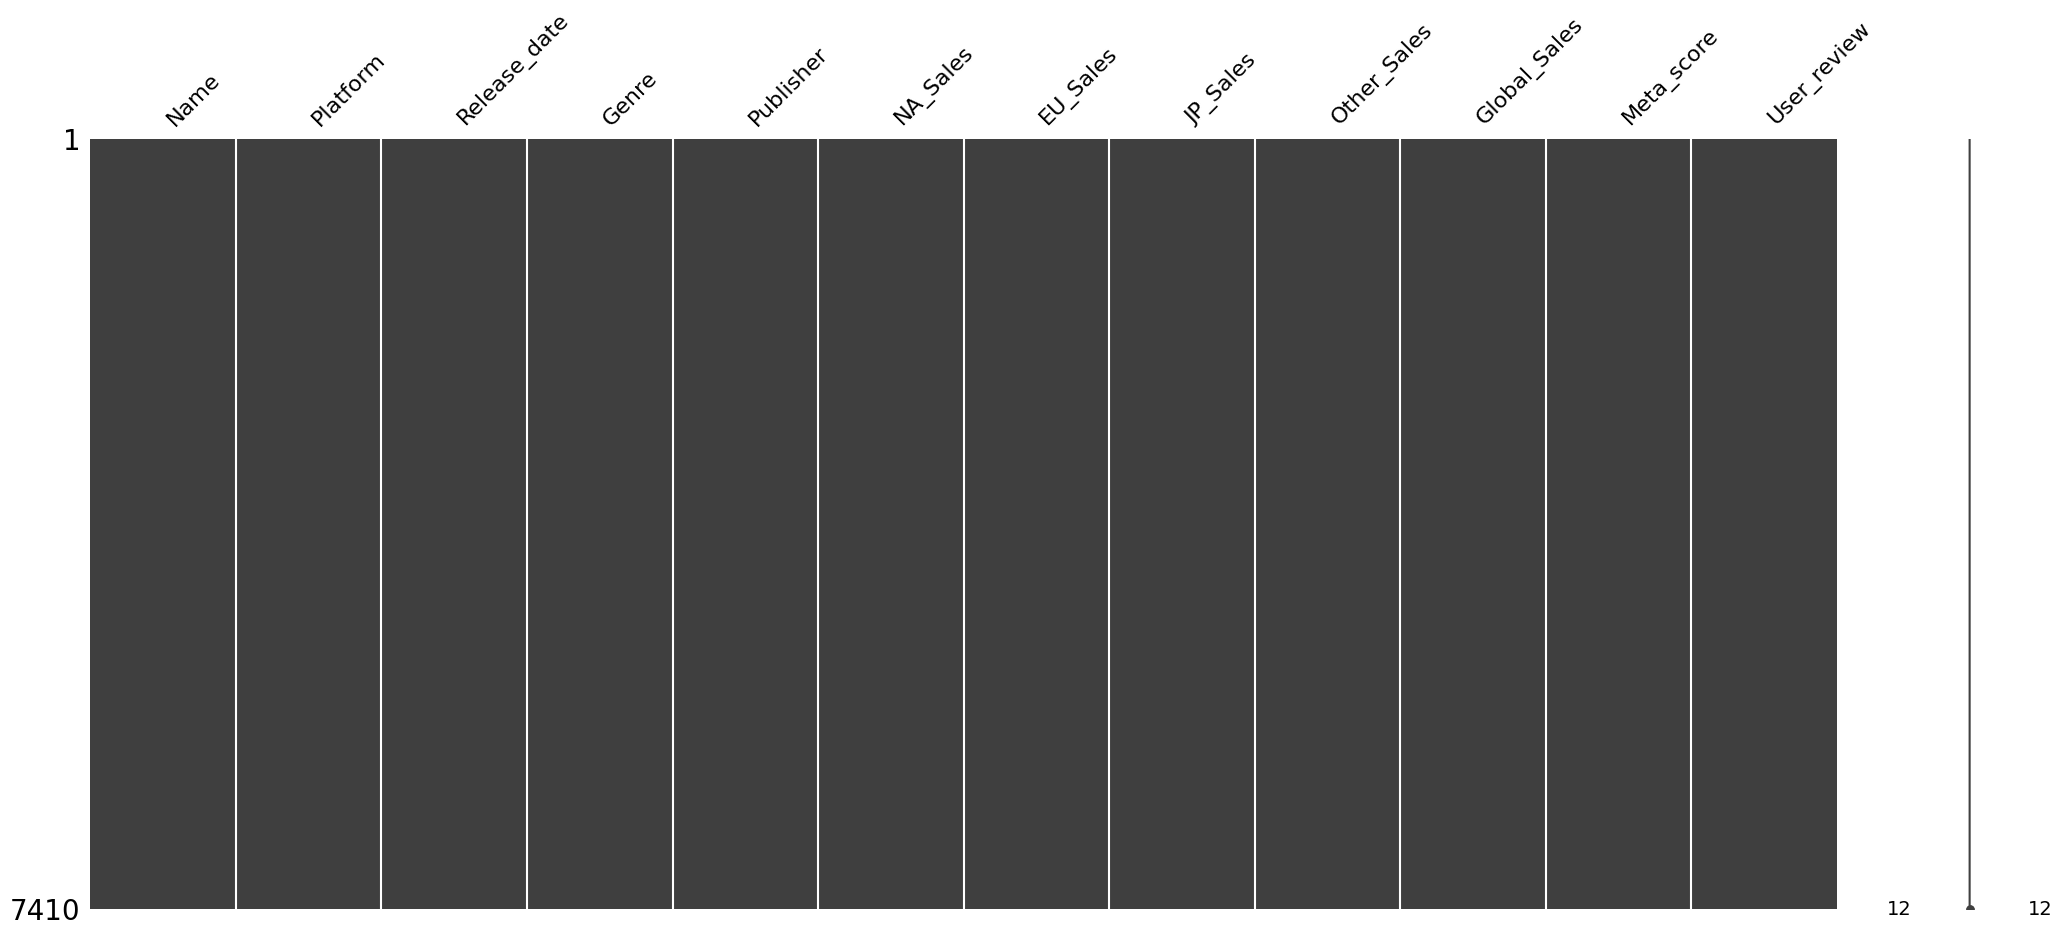

In [61]:
import missingno as msno

msno.matrix(combined_with_external)

## **Report 4**

*   Data was extended successfully

*   We had **5463** games before intergrating the new dataset.
*   Now, combining with this new dataset increased our total number of games to be **7409**.

---


# **5. Preparation**


---


After collecting all the data we need, standardizing them, and merging all of them into one dataset, we check lastly if there are any outliers before applying statistical tests in order to have a clean analysis.

## ***5.1. Outliers***



*   Using the z-score, we check if there are any outliers in the datasets


In [62]:
def zscore(x):
    if x.dtype != object:
        zscores = (x - x.mean()) / x.std()
        return zscores
    return pd.Series([None] * len(x), index=x.index)

zscores = combined_with_external.apply(zscore)

for c in combined_with_external._get_numeric_data().columns:
    print(f"Number of outliers for {c} = {combined_with_external.loc[zscores[c] > 3, c].count()}")

Number of outliers for Release_date = 0
Number of outliers for NA_Sales = 87
Number of outliers for EU_Sales = 89
Number of outliers for JP_Sales = 108
Number of outliers for Other_Sales = 77
Number of outliers for Global_Sales = 92
Number of outliers for Meta_score = 0
Number of outliers for User_review = 0


* Identify these outliers and put them in a dataset

In [63]:
# Create a mask for outliers
outlier_mask = zscores[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].gt(3).any(axis=1)

# Filter the dataframe to get all outliers
outliers_df = combined_with_external[outlier_mask]

# Create a new column indicating which sales regions are outliers
def identify_outliers(row):
    regions = [col for col in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'] if row[col] > 3]
    return ', '.join(regions)

# Apply the identify_outliers function to the zscores dataframe
zscores_outliers = zscores.loc[outlier_mask, ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].apply(identify_outliers, axis=1)

# Add the new column to the outliers dataframe
outliers_df = outliers_df.copy()
outliers_df['Outlier_Regions'] = zscores_outliers.values

outliers_df.drop(columns=['User_review', 'Meta_score', 'Release_date', 'Publisher', 'Genre', 'Platform'], inplace=True)

outliers_df

,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Outlier_Regions
0,wii_sports,41.49,29.02,3.77,8.46,82.74,"NA_Sales, EU_Sales, JP_Sales, Other_Sales, Glo..."
1,mario_kart_wii,15.85,12.88,3.79,3.31,35.83,"NA_Sales, EU_Sales, JP_Sales, Other_Sales, Glo..."
2,wii_sports_resort,15.75,11.01,3.28,2.96,33.00,"NA_Sales, EU_Sales, JP_Sales, Other_Sales, Glo..."
3,new_super_mario_bros,11.38,9.23,6.50,2.90,30.01,"NA_Sales, EU_Sales, JP_Sales, Other_Sales, Glo..."
4,new_super_mario_bros_wii,14.59,7.06,4.70,2.26,28.61,"NA_Sales, EU_Sales, JP_Sales, Other_Sales, Glo..."
...,...,...,...,...,...,...,...
1186,dragon_quest_v_hand_of_the_heavenly_bride,0.17,0.02,1.36,0.02,1.57,JP_Sales
1361,dragon_quest_monsters_joker_2,0.09,0.07,1.24,0.02,1.42,JP_Sales
1457,monster_hunter_freedom,0.24,0.03,1.03,0.04,1.34,JP_Sales
1511,singstar_80s,0.27,0.02,0.00,1.02,1.31,Other_Sales


**The detected outliers by z-scores are indeed sales outside the norm. Some of them are top games in specific regions. To apply a proper test to see the impact of ratings on sales, we are going to eliminate these outliers in general. However, on the other hand, these outliers provide very interesting information when trying to explain the differences in sales by region. Consequently, we will not drop them in the second test.**

So we will differentiate 2 data frames from now :
*   **data_test_1** : (without outliers) adapted for the 1st test
*   **data_test_2** : (with outliers) adapted for the 2nd test



## ***5.2. Organization***

In [64]:
# Create data_test_1 by removing outliers based on the Name column from outliers_df['Name']
data_test_1 = combined_with_external[~combined_with_external['Name'].isin(outliers_df['Name'])].copy()
data_test_1

,Name,Platform,Release_date,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Meta_score,User_review
93,metal_gear_solid_2_sons_of_liberty,PlayStation 2,2001,Action,Konami Digital Entertainment,2.45,2.01,0.87,0.72,6.05,96,8.8
94,metal_gear_solid_4_guns_of_the_patriots,PlayStation 3,2008,Action,Konami Digital Entertainment,2.63,1.74,0.83,0.83,6.03,94,8.8
95,metal_gear_solid,PlayStation,1998,Action,Konami Digital Entertainment,3.18,1.83,0.78,0.24,6.03,94,9.2
102,cooking_mama,DS,2006,Simulation,505 Games,3.13,1.94,0.07,0.58,5.72,67,7.3
104,assassins_creed_ii,PlayStation 3,2009,Action,Ubisoft,2.54,1.95,0.21,0.87,5.57,91,8.7
...,...,...,...,...,...,...,...,...,...,...,...,...
16664,prison_architect,Xbox One,2016,Action,Introversion Software,0.01,0.00,0.00,0.00,0.01,74,6.7
16667,et_the_extraterrestrial,Game Boy Advance,2001,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,46,2.4
16696,metal_gear_solid_v_ground_zeroes,PC,2014,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80,7.6
16700,breach,PC,2011,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61,5.8


In [65]:
# Create data_test_2 : all games (with outliers)
data_test_2 = combined_with_external.copy()



---


# **6. Analyse**


---



1. ***Impact of Ratings on Sales***
  *   **TEST 1 :** Explain if the ratings of games (MetaCritic and user reviews) have an impact on global and regional game sales.


2. ***Differences in Sales by Region***
  *   **TEST 2 :** Explain the differences in sales by region (North America, Europe, Japan, and the rest of the world).

## ***TEST 1 : Impact of Ratings on Sales***



*   starting by some basic statistics to understand the relationship between ratings and sales.




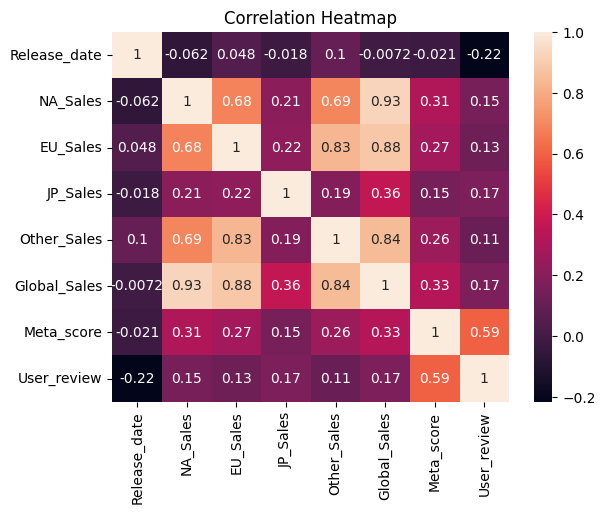

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_heat = data_test_1[['Release_date', 'NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales',	'Global_Sales', 'Meta_score', 'User_review']].corr()
sns.heatmap(corr_heat, annot=True)
plt.title('Correlation Heatmap')
plt.show()

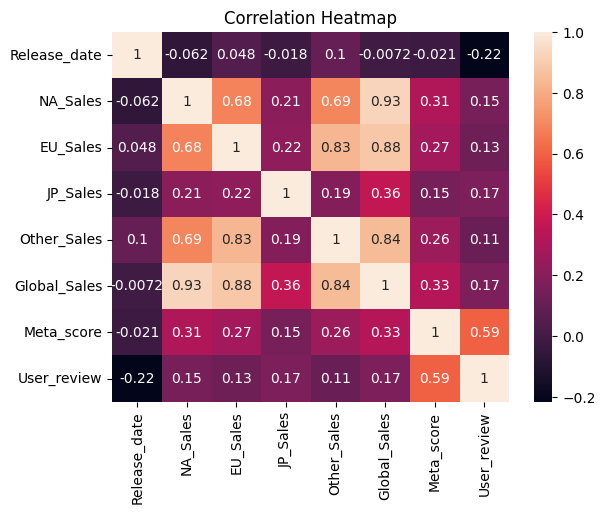

In [67]:
corr_heat = data_test_1[['Release_date', 'NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales',	'Global_Sales', 'Meta_score', 'User_review']].corr()
sns.heatmap(corr_heat, annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [68]:
correlation_meta = data_test_1[['Meta_score', 'Global_Sales']].corr().iloc[0, 1]
correlation_user = data_test_1[['User_review', 'Global_Sales']].corr().iloc[0, 1]

print('Correlation between Meta Score ratings and Global Sales: ', correlation_meta)
print('Correlation between User Reviews and Global Sales:', correlation_user)

Correlation between Meta Score ratings and Global Sales:  0.3284449323446236
Correlation between User Reviews and Global Sales: 0.17076469281759468


Both of the results say that there is a positive correlation but a moderate one **(0.328 and 0.170)**.

Let's visulize it using a plot !

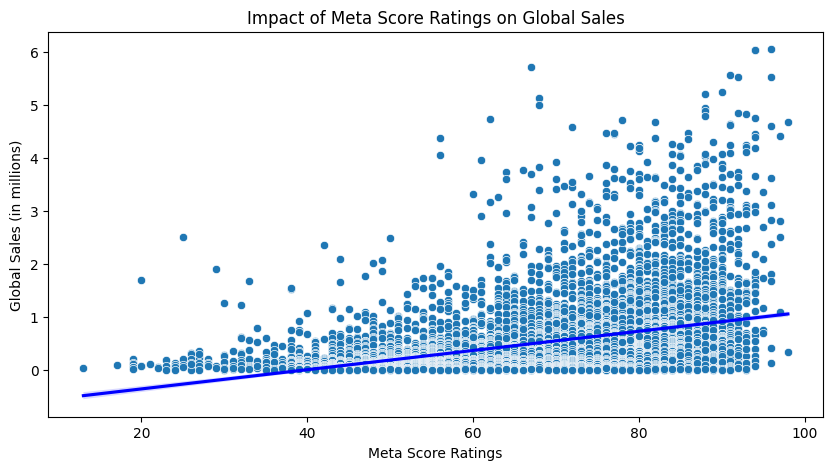

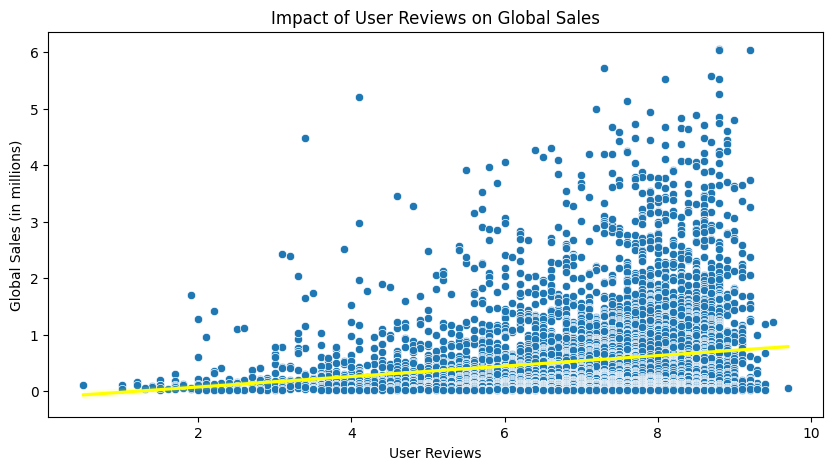

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for MetaCritic ratings vs Global Sales
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Meta_score', y='Global_Sales', data=data_test_1)
sns.regplot(x='Meta_score', y='Global_Sales', data=data_test_1, scatter=False, color='blue')
plt.title('Impact of Meta Score Ratings on Global Sales')
plt.xlabel('Meta Score Ratings')
plt.ylabel('Global Sales (in millions)')
plt.show()

# Scatter plot for User Reviews vs Global Sales
plt.figure(figsize=(10, 5))
sns.scatterplot(x='User_review', y='Global_Sales', data=data_test_1)
sns.regplot(x='User_review', y='Global_Sales', data=data_test_1, scatter=False, color='yellow')
plt.title('Impact of User Reviews on Global Sales')
plt.xlabel('User Reviews')
plt.ylabel('Global Sales (in millions)')
plt.show()

As expected from correlation values, the plots and matrix show a weak to moderate positive relation between Meta score / User reviews and global sales.

Now, to insure whether this correlation is significant or not, we need to use a statistical test

**Objective of test:** To determine if there is a statistically significant relationship between game ratings (MetaCritic and User Reviews) and global sales.

To determine which test to use, we need to set some parameters:

1.   **Variables** :
    - **Meta Score Ratings (continuous)**: Scores from Meta_score.
    - **User Reviews (continuous)**: User_review scores.
    - **Global Sales (continuous)**: Total global_Sales in millions.

2.  **Test Statistic** :    
    - **Pearson's test:** Measures the strength and direction of the linear relationship between two variables.

3.   **Hypotheses** :
    - ***Meta Score Ratings and Global Sales***:
          - **H0**: There is no linear relationship between Meta Score Ratings and global sales.
          - **H1**: There is a linear relationship between Meta Score Ratings and global sales.

    - ***User Reviews and Global Sales***:
          - **H0**: There is no linear relationship between user reviews and global sales.
          - **H1**: There is a linear relationship between user reviews and global sales.


In [70]:
from scipy.stats import pearsonr

# Pearson's correlation and p-value for Meta Score Ratings and Global Sales
meta_critics_corr, meta_critics_p_value = pearsonr(data_test_1['Meta_score'], data_test_1['Global_Sales'])

# Pearson's correlation and p-value for User Reviews and Global Sales
user_reviews_corr, user_reviews_p_value = pearsonr(data_test_1['User_review'], data_test_1['Global_Sales'])

print('Pearson correlation (Meta Score Ratings & Global Sales): ', meta_critics_corr , ', p-value: ', meta_critics_p_value)
print('Pearson correlation (User Reviews & Global Sales): ', user_reviews_corr , ', p-value: ', user_reviews_p_value)

Pearson correlation (Meta Score Ratings & Global Sales):  0.3284449323446175 , p-value:  3.3778872791566906e-176
Pearson correlation (User Reviews & Global Sales):  0.17076469281759366 , p-value:  4.477901543281565e-47


### Interpretation

*   **Both correlations are statistically significant (p-values < 0.05 ).**
*   **This means that there is moderate relationship between the ratings and Global Sales.**
*   **By observing the plots, we see that increasing in reviews, indicates an increase in the nomber of global sales :)**





## ***TEST 2 : Differences in Sales by Region***

### Average Sales by Region

*   starting by some basic statistics to understand the average sales by regions

In [71]:
# Calculate average sales by region
region_sales = data_test_2[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].mean()
print(region_sales)

NA_Sales       0.389879
EU_Sales       0.232895
JP_Sales       0.063568
Other_Sales    0.081042
dtype: float64


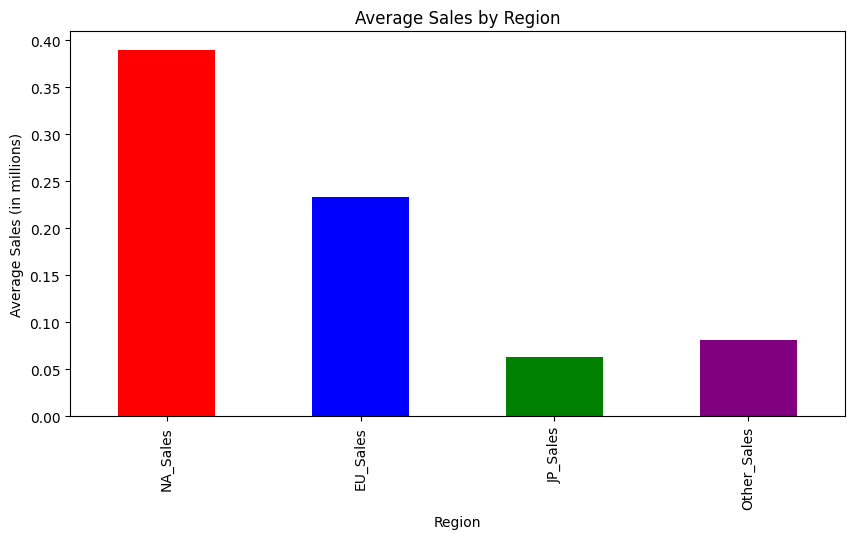

In [72]:
# Bar plot for average sales by region
plt.figure(figsize=(10, 5))
region_sales.plot(kind='bar', color=['red', 'blue', 'green', 'purple'])
plt.title('Average Sales by Region')
plt.xlabel('Region')
plt.ylabel('Average Sales (in millions)')
plt.show()

**Observations** : By looking into the plot, we observe that sales are ordered as NA > EU > Other > JP

### Average Sales by Platforms

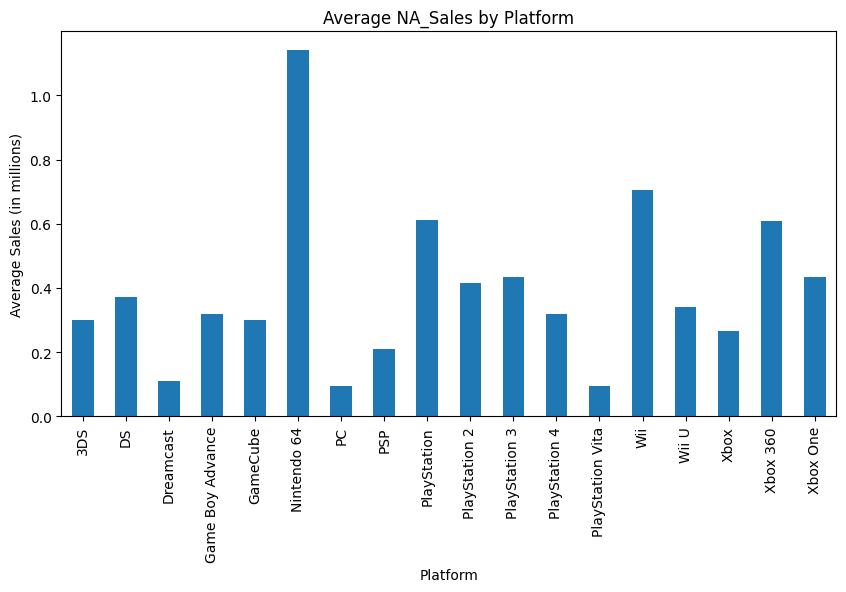

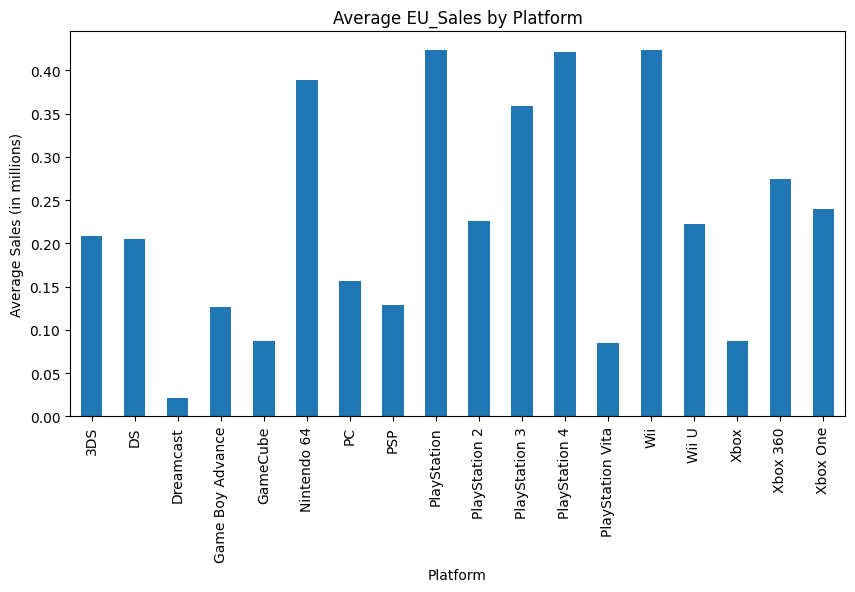

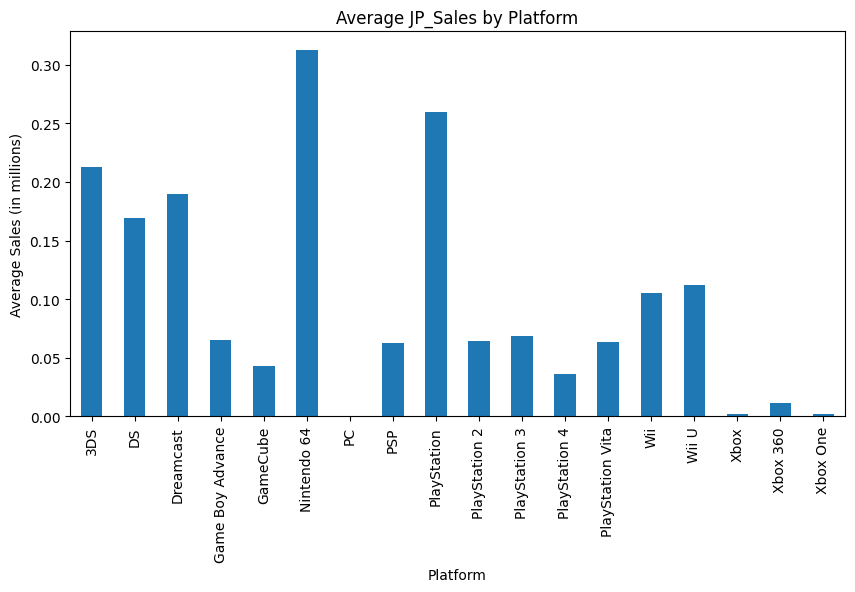

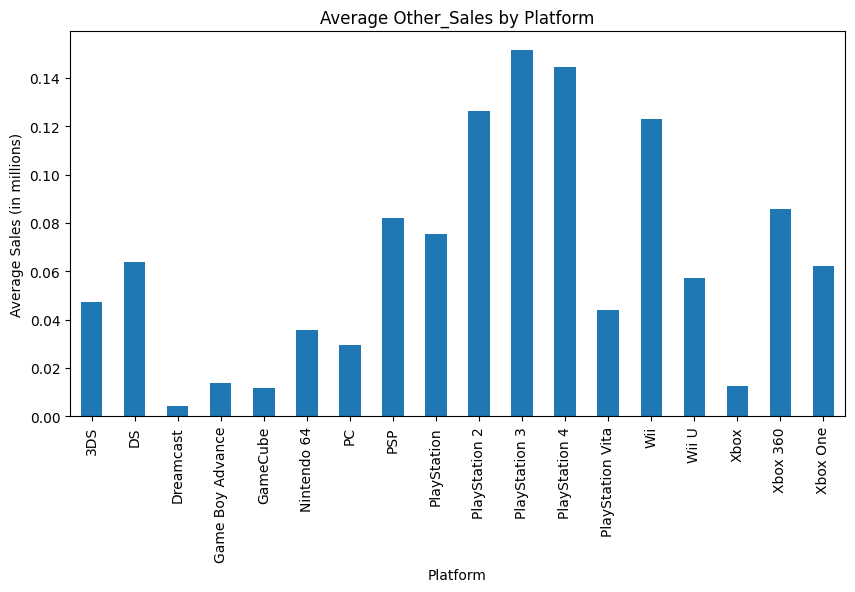

In [73]:
for region in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']:
    means = data_test_2.groupby('Platform')[region].mean()
    plt.figure(figsize=(10, 5))
    means.plot(kind='bar')
    plt.title(f'Average {region} by Platform')
    plt.xlabel('Platform')
    plt.ylabel('Average Sales (in millions)')
    plt.show()

**Observations** :

1.   **NA and EU:** Similar preferences for PlayStation and Wii and Xbox platforms.

2.   **Japan**: Strong preference for local platforms like Nintendo.

3.  **Other Regions**: Similar trends to NA and EU, with more influnce to PlayStation platforms.



### Regional Sales Over The Time

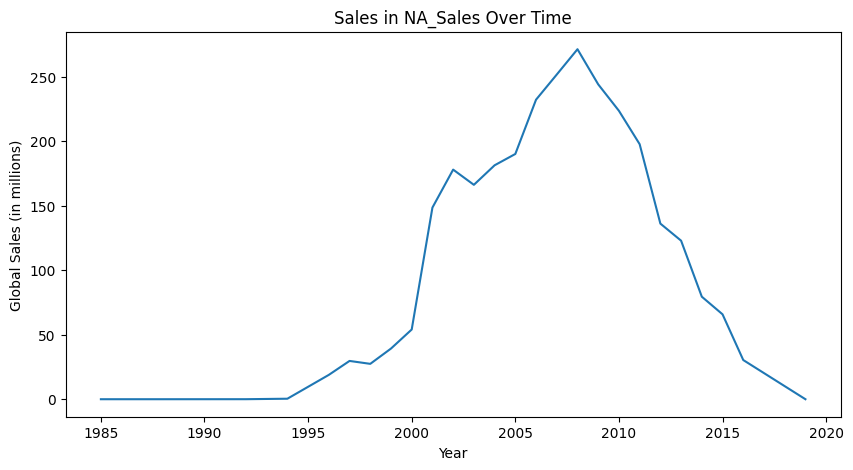

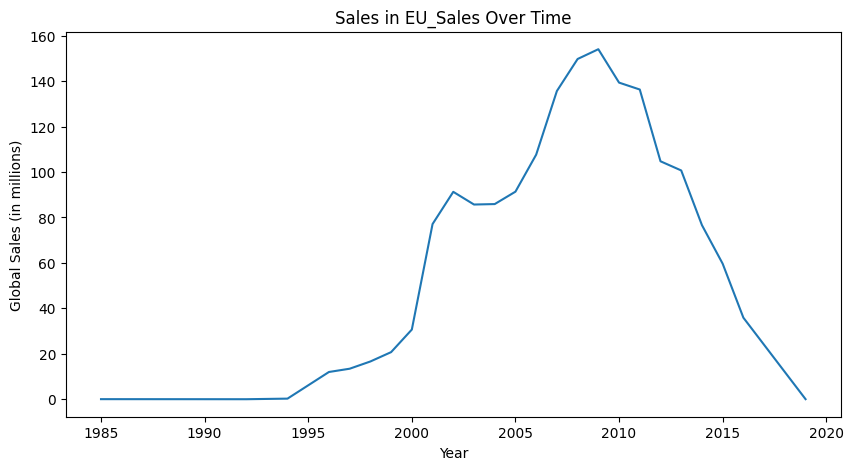

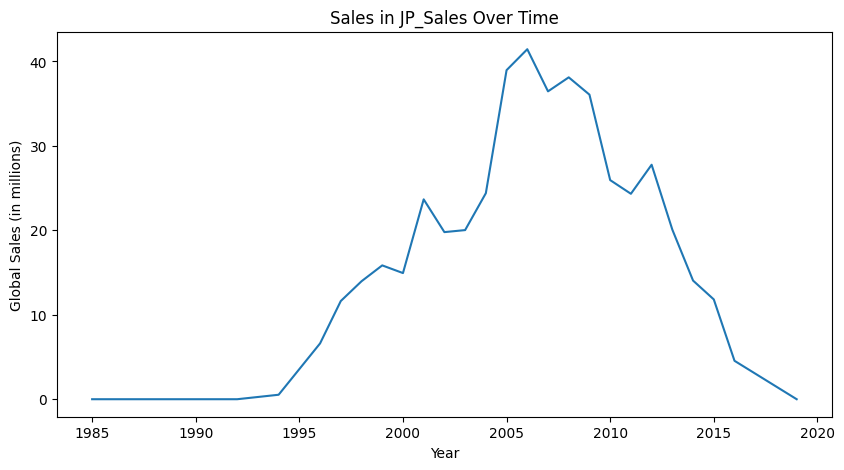

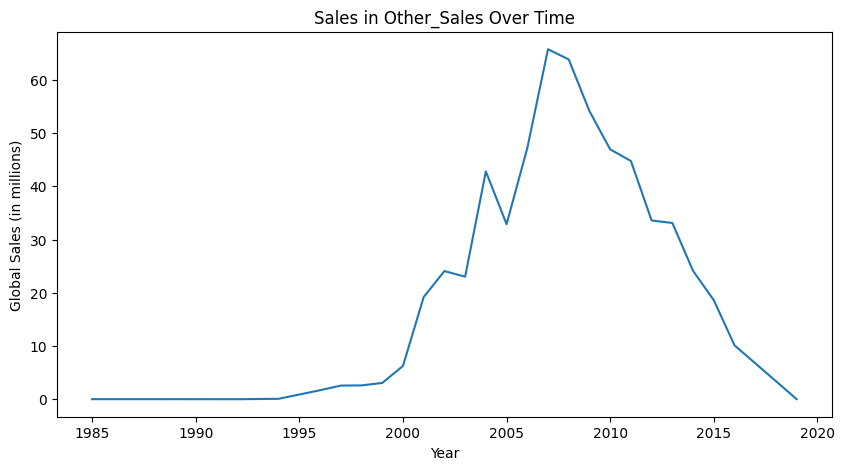

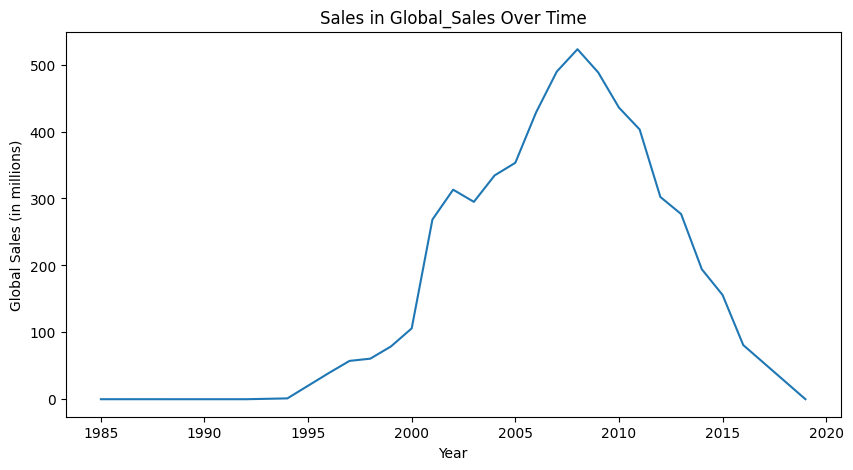

In [74]:
for region in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']:
  annual_sales = data_test_2.groupby('Release_date')[region].sum().reset_index()

  plt.figure(figsize=(10, 5))
  sns.lineplot(x='Release_date', y=region, data=annual_sales)
  plt.title(f'Sales in {region} Over Time')
  plt.xlabel('Year')
  plt.ylabel('Global Sales (in millions)')

**Observations** :

*   Significant rise in global sales from 1995  

*   Significant peak around 2005 - 2010 coincides with the release of popular consoles like the Wii, Xbox 360, and PS3, and a lot of famous games .



### Best 3 games for each region




**Top 3 games in North America:**

In [75]:
na_sales = data_test_2[['Name', 'NA_Sales']]
na_sales_top_3 = na_sales.groupby('Name')['NA_Sales'].sum().reset_index()\
    .sort_values(by='NA_Sales', ascending=False).head(3)
na_sales_top_3

,Name,NA_Sales
4534,wii_sports,41.49
1605,grand_theft_auto_v,23.46
508,call_of_duty_black_ops,17.59


**Top 3 games in Europe:**

In [76]:
eu_sales = data_test_2[['Name', 'EU_Sales']]
eu_sales_top_3 = eu_sales.groupby('Name')['EU_Sales'].sum().reset_index()\
    .sort_values(by='EU_Sales', ascending=False).head(3)
eu_sales_top_3

,Name,EU_Sales
4534,wii_sports,29.02
1605,grand_theft_auto_v,23.04
2217,mario_kart_wii,12.88


**Top 3 games in Japan:**

In [77]:
jp_sales = data_test_2[['Name', 'JP_Sales']]
jp_sales_top_3 = jp_sales.groupby('Name')['JP_Sales'].sum().reset_index()\
    .sort_values(by='JP_Sales', ascending=False).head(3)
jp_sales_top_3

,Name,JP_Sales
2711,new_super_mario_bros,6.50
124,animal_crossing_wild_world,5.33
427,brain_age_2_more_training_in_minutes_a_day,5.32


**Top 3 games in the rest of the world:**

In [78]:
other_sales = data_test_2[['Name', 'Other_Sales']]
other_sales_top_3 = other_sales.groupby('Name')['Other_Sales'].sum().reset_index()\
    .sort_values(by='Other_Sales', ascending=False).head(3)
other_sales_top_3

,Name,Other_Sales
1604,grand_theft_auto_san_andreas,10.71
4534,wii_sports,8.46
1605,grand_theft_auto_v,8.03


**Top 3 games globally:**

In [79]:
global_sales = data_test_2[['Name', 'Global_Sales']]
global_sales_top_3 = global_sales.groupby('Name')['Global_Sales'].sum().reset_index()\
    .sort_values(by='Global_Sales', ascending=False).head(3)
global_sales_top_3

,Name,Global_Sales
4534,wii_sports,82.74
1605,grand_theft_auto_v,55.92
2217,mario_kart_wii,35.83


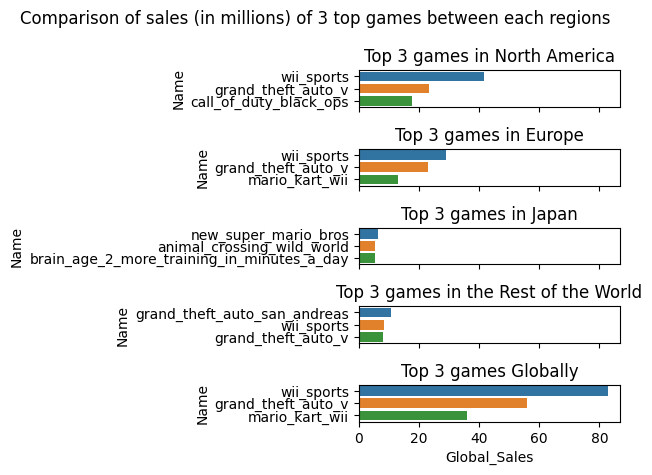

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(5, 1, sharex=True)

# North America
sns.barplot(ax=axes[0], data=na_sales_top_3, x='NA_Sales', y='Name', orient='h', hue='Name')
axes[0].set_title('Top 3 games in North America')

# Europe
sns.barplot(ax=axes[1], data=eu_sales_top_3, x='EU_Sales', y='Name', orient='h', hue='Name')
axes[1].set_title('Top 3 games in Europe')

# Japan
sns.barplot(ax=axes[2], data=jp_sales_top_3, x='JP_Sales', y='Name', orient='h', hue='Name')
axes[2].set_title('Top 3 games in Japan')

# Others
sns.barplot(ax=axes[3], data=other_sales_top_3, x='Other_Sales', y='Name', orient='h', hue='Name')
axes[3].set_title('Top 3 games in the Rest of the World')

# Global
sns.barplot(ax=axes[4], data=global_sales_top_3, x='Global_Sales', y='Name', orient='h', hue='Name')
axes[4].set_title('Top 3 games Globally')

fig.suptitle('Comparison of sales (in millions) of 3 top games between each regions')
plt.tight_layout()
plt.show()

**Observations** :

1.   (NA): "**Wii Sports**", "**Grand Theft Auto V**", and "**Call of Duty: Black Ops**" are the top 3 games. We can say that NA people have a preference for both family-friendly and action/shooter games.

2.   (EU): "**Wii Sports**", "**Grand Theft Auto V**", and "**Mario Kart Wii**". Similar taste to NA.

3.   (JP): "**New Super Mario Bros.**", "**Animal Crossing: Wild World**", and "**Brain Age 2**" are the top games. All these games are Nintendo games. We can say that JP people show a preference for locally developeded games.

4.   Rest of the World: The top games include **"Grand Theft Auto: San Andreas", "Wii Sports", and "Grand Theft Auto V"**.

5.   Globally: The top games are **"Wii Sports", "Grand Theft Auto V", and "Mario Kart Wii"**. These games en general have wide acceptance across different regions.







### Interpretation

*   **Regional Preferences: There are clear regional preferences for certain games and platforms, with Nintendo and PlayStation dominating in Japan, while North America and Europe show strong sales across a variety of platforms including Xbox.**

*   **Peak Sales Period: The period around 2005-2010 was a peak time for game sales globally, driven by popular console releases and major game titles.**
